In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random
from extract_center import CenterExtracter
plt.rcdefaults()


## Getting All The Points

In [2]:
plt.rcdefaults()

In [3]:
c = CenterExtracter()

In [4]:
x, y= (0,0)
h, w=(500,500)
img = c._read_image_("34.jpg")
img = c._subtract_image_(img)
img = c._threshold_(image = img)
img = c._crop_(img, x, y, h, w)

In [5]:
c._show_image_(img)

In [6]:
ys1 = np.nonzero(img.argmax(axis=1))[0]
xs1 = np.nonzero(img.argmax(axis=0))[0]
xs2 = img.argmax(axis=1)[ys1]
ys2 = img.argmax(axis=0)[xs1]

In [7]:
ys1, ys2

(array([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64),
 array([88, 84, 82, 81, 80, 79, 79, 78, 78, 78, 78, 78, 78, 78, 79, 79, 80,
        80, 81, 83, 84, 88], dtype=int64))

In [8]:
xs1, xs2

(array([159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180], dtype=int64),
 array([166, 164, 163, 162, 161, 161, 160, 160, 160, 160, 159, 159, 159,
        159, 160, 160, 160, 161, 161, 162, 163, 165, 171], dtype=int64))

In [9]:
plt.imshow(-img, cmap='gray')
plt.plot(xs1, ys2, 'ro')
plt.xlim([150, 200])
plt.ylim([110,75])

(110.0, 75.0)

In [10]:
plt.imshow(-img, cmap='gray')
plt.plot(xs2, ys1, 'ro')
plt.xlim([150, 200])
plt.ylim([110,75])

(110.0, 75.0)

(110.0, 75.0)

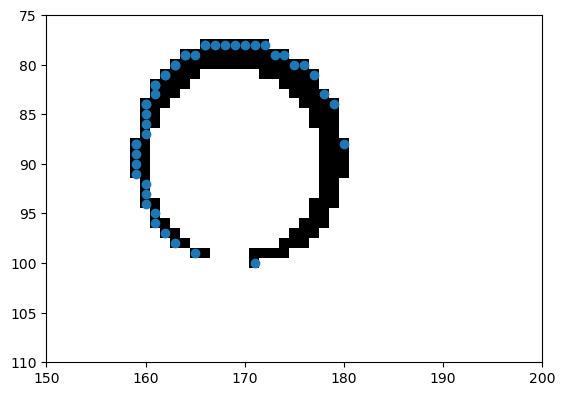

In [11]:
xs = (np.concatenate((xs2, xs1), axis=0))
ys = (np.concatenate((ys1, ys2), axis=0))
plt.imshow(-img, cmap='gray')
plt.scatter(xs, ys)
plt.xlim([150, 200])
plt.ylim([110,75])

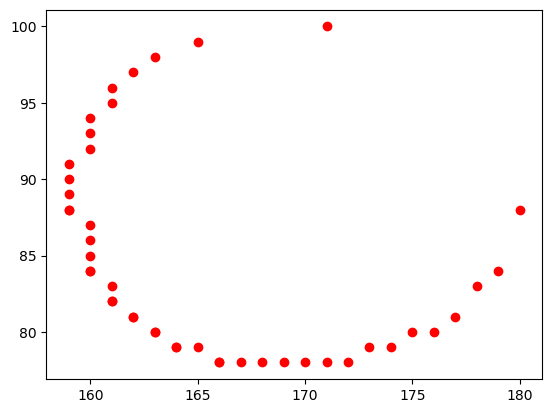

In [12]:
plt.plot(xs, ys, 'ro')

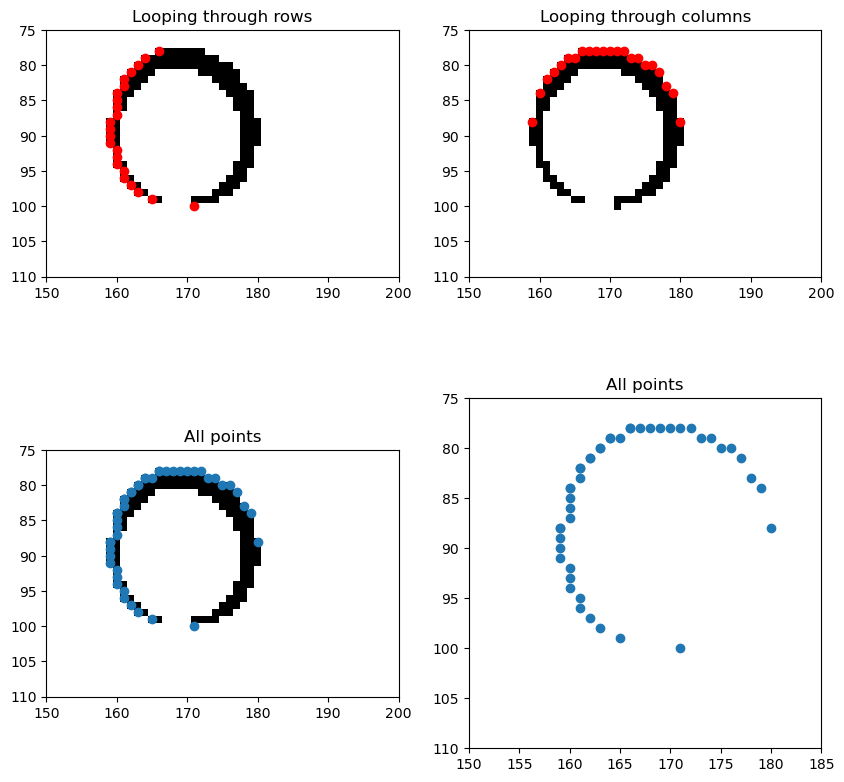

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(-img, cmap='gray')
plt.plot(xs2, ys1, 'ro')
plt.xlim([150, 200])
plt.ylim([110,75])
plt.title("Looping through rows")

plt.subplot(2,2,2)
plt.imshow(-img, cmap='gray')
plt.plot(xs1, ys2, 'ro')
plt.xlim([150, 200])
plt.ylim([110,75])
plt.title("Looping through columns")

plt.subplot(2,2,3)
xs = (np.concatenate((xs2, xs1), axis=0))
ys = (np.concatenate((ys1, ys2), axis=0))
plt.imshow(-img, cmap='gray')
plt.scatter(xs, ys)
plt.xlim([150, 200])
plt.ylim([110,75])
plt.title("All points")

plt.subplot(2,2,4)
plt.scatter(xs, ys)
plt.xlim([150, 185])
plt.ylim([110,75])
plt.title("All points")
plt.savefig("all_points.png")

## Fitting Ellipse

In [13]:
import numpy as np
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

center =  (169.50938791025933, 89.03708773169903)
angle of rotation =  -0.11690620106792708
axes =  (10.401344987659826, 11.294534562763964)


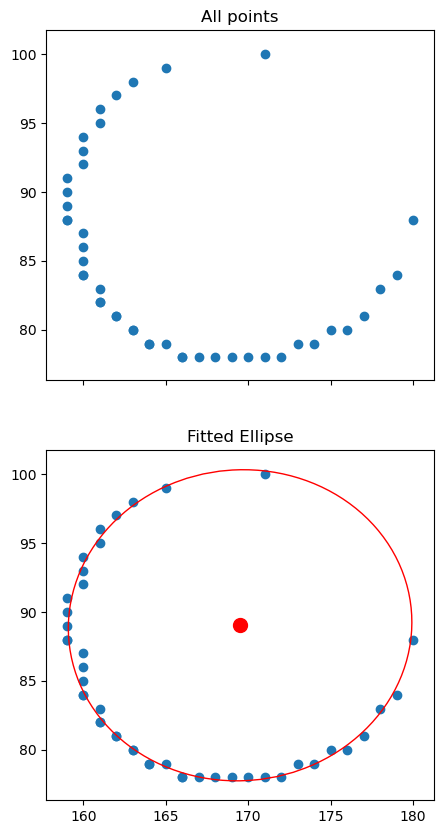

In [21]:
points = np.array([xs, ys]).T
ell = EllipseModel()
ell.estimate(points)
xc, yc, a, b, theta = ell.params

print("center = ",  (xc, yc))
print("angle of rotation = ",  theta)
print("axes = ", (a,b))

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches(5, 10)
axs[0].scatter(xs,ys)

axs[1].scatter(xs, ys)
axs[1].scatter(xc, yc, color='red', s=100)
axs[0].set_title("All points")
# axs[1].set_xlim(xs.min(), xs.max())
# axs[1].set_ylim(ys.min(), ys.max())

ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor='red', facecolor='none')

axs[1].add_patch(ell_patch)
axs[1].set_title("Fitted Ellipse")
plt.show()
fig.savefig("ellipse_fit.png")

## Making A Function

In [25]:
def all_points(image):
    c = CenterExtracter()
    x, y= (0,0)
    h, w=(500,500)
    img = c._read_image_(image)
    img = c._subtract_image_(img)
    img = c._threshold_(image = img)
    img = c._crop_(img, x, y, h, w)

    ys1 = np.nonzero(img.argmax(axis=1))[0]
    xs1 = np.nonzero(img.argmax(axis=0))[0]
    xs2 = img.argmax(axis=1)[ys1]
    ys2 = img.argmax(axis=0)[xs1]

    xs = (np.concatenate((xs2, xs1), axis=0))
    ys = (np.concatenate((ys1, ys2), axis=0))
    return xs, ys


In [26]:
def fit_ellipse(image, crop_included=True):
    xs, ys = all_points(image)
    points = np.array([xs, ys]).T
    ell = EllipseModel()
    ell.estimate(points)
    xc, yc, a, b, theta = ell.params
    if crop_included:
        xc+=c.X
        yc+=c.Y
    return int(xc), int(yc), int(a), int(b), round(theta,2)

In [27]:
image = "../data/images1/12.jpg"
fit_ellipse(image)

(870, 406, 9, 11, 1.69)

In [28]:
image = "../data/images1/112.jpg"
fit_ellipse(image)

(987, 595, 10, 6, 2.02)

## Using The Function

In [29]:
c = CenterExtracter()

In [30]:
imgs = os.listdir("../data/images1")
len(imgs)

171

In [31]:
sorted_images = sorted(imgs, key=lambda x: int(x.split(".")[0]))

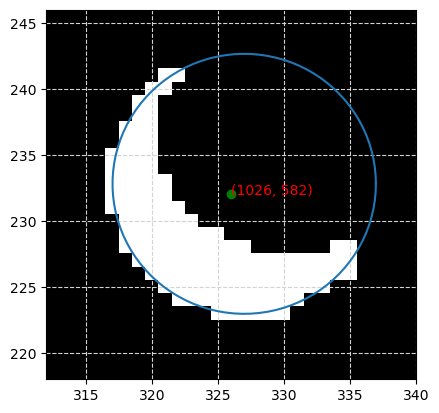

((1026, 582), (9, 9), -0.2)

In [32]:
img = "120.jpg"
img_path = "../data/images1"+f"/{img}"
c.fit_ellipse(img_path, )

In [33]:
xcs = []
ycs = []
r1s = []
r2s = []
thetas = []

for img in sorted_images:
    img_path = "../data/images1"+f"/{img}"
    try:
        (xc, yc), (a, b), theta = c.fit_ellipse(img_path, plot=False)
        xcs.append(xc)
        ycs.append(yc)
        r1s.append(a)
        r2s.append(b)
        thetas.append(theta)
    except:
        print(f"Error at: {img}")
        xcs.append(None)
        ycs.append(None)
        r1s.append(None)
        r2s.append(None)
        thetas.append(None)

Error at: 71.jpg
Error at: 72.jpg
Error at: 102.jpg
Error at: 159.jpg
Error at: 160.jpg
Error at: 161.jpg
Error at: 162.jpg
Error at: 163.jpg
Error at: 164.jpg
Error at: 165.jpg
Error at: 166.jpg
Error at: 167.jpg
Error at: 168.jpg
Error at: 169.jpg
Error at: 170.jpg


In [ ]:
df = pd.DataFrame({"image": sorted_images, "x": xcs, "y": ycs, "r1": r1s, "r2": r2s, "theta":thetas})
df.head()

image      x      y   r1    r2  theta
0  0.jpg  869.0  403.0  8.0  12.0   0.24
1  1.jpg  869.0  403.0  8.0  12.0   0.25
2  2.jpg  869.0  403.0  9.0  12.0   0.25
3  3.jpg  869.0  403.0  9.0  12.0   0.24
4  4.jpg  869.0  403.0  9.0  12.0   0.26

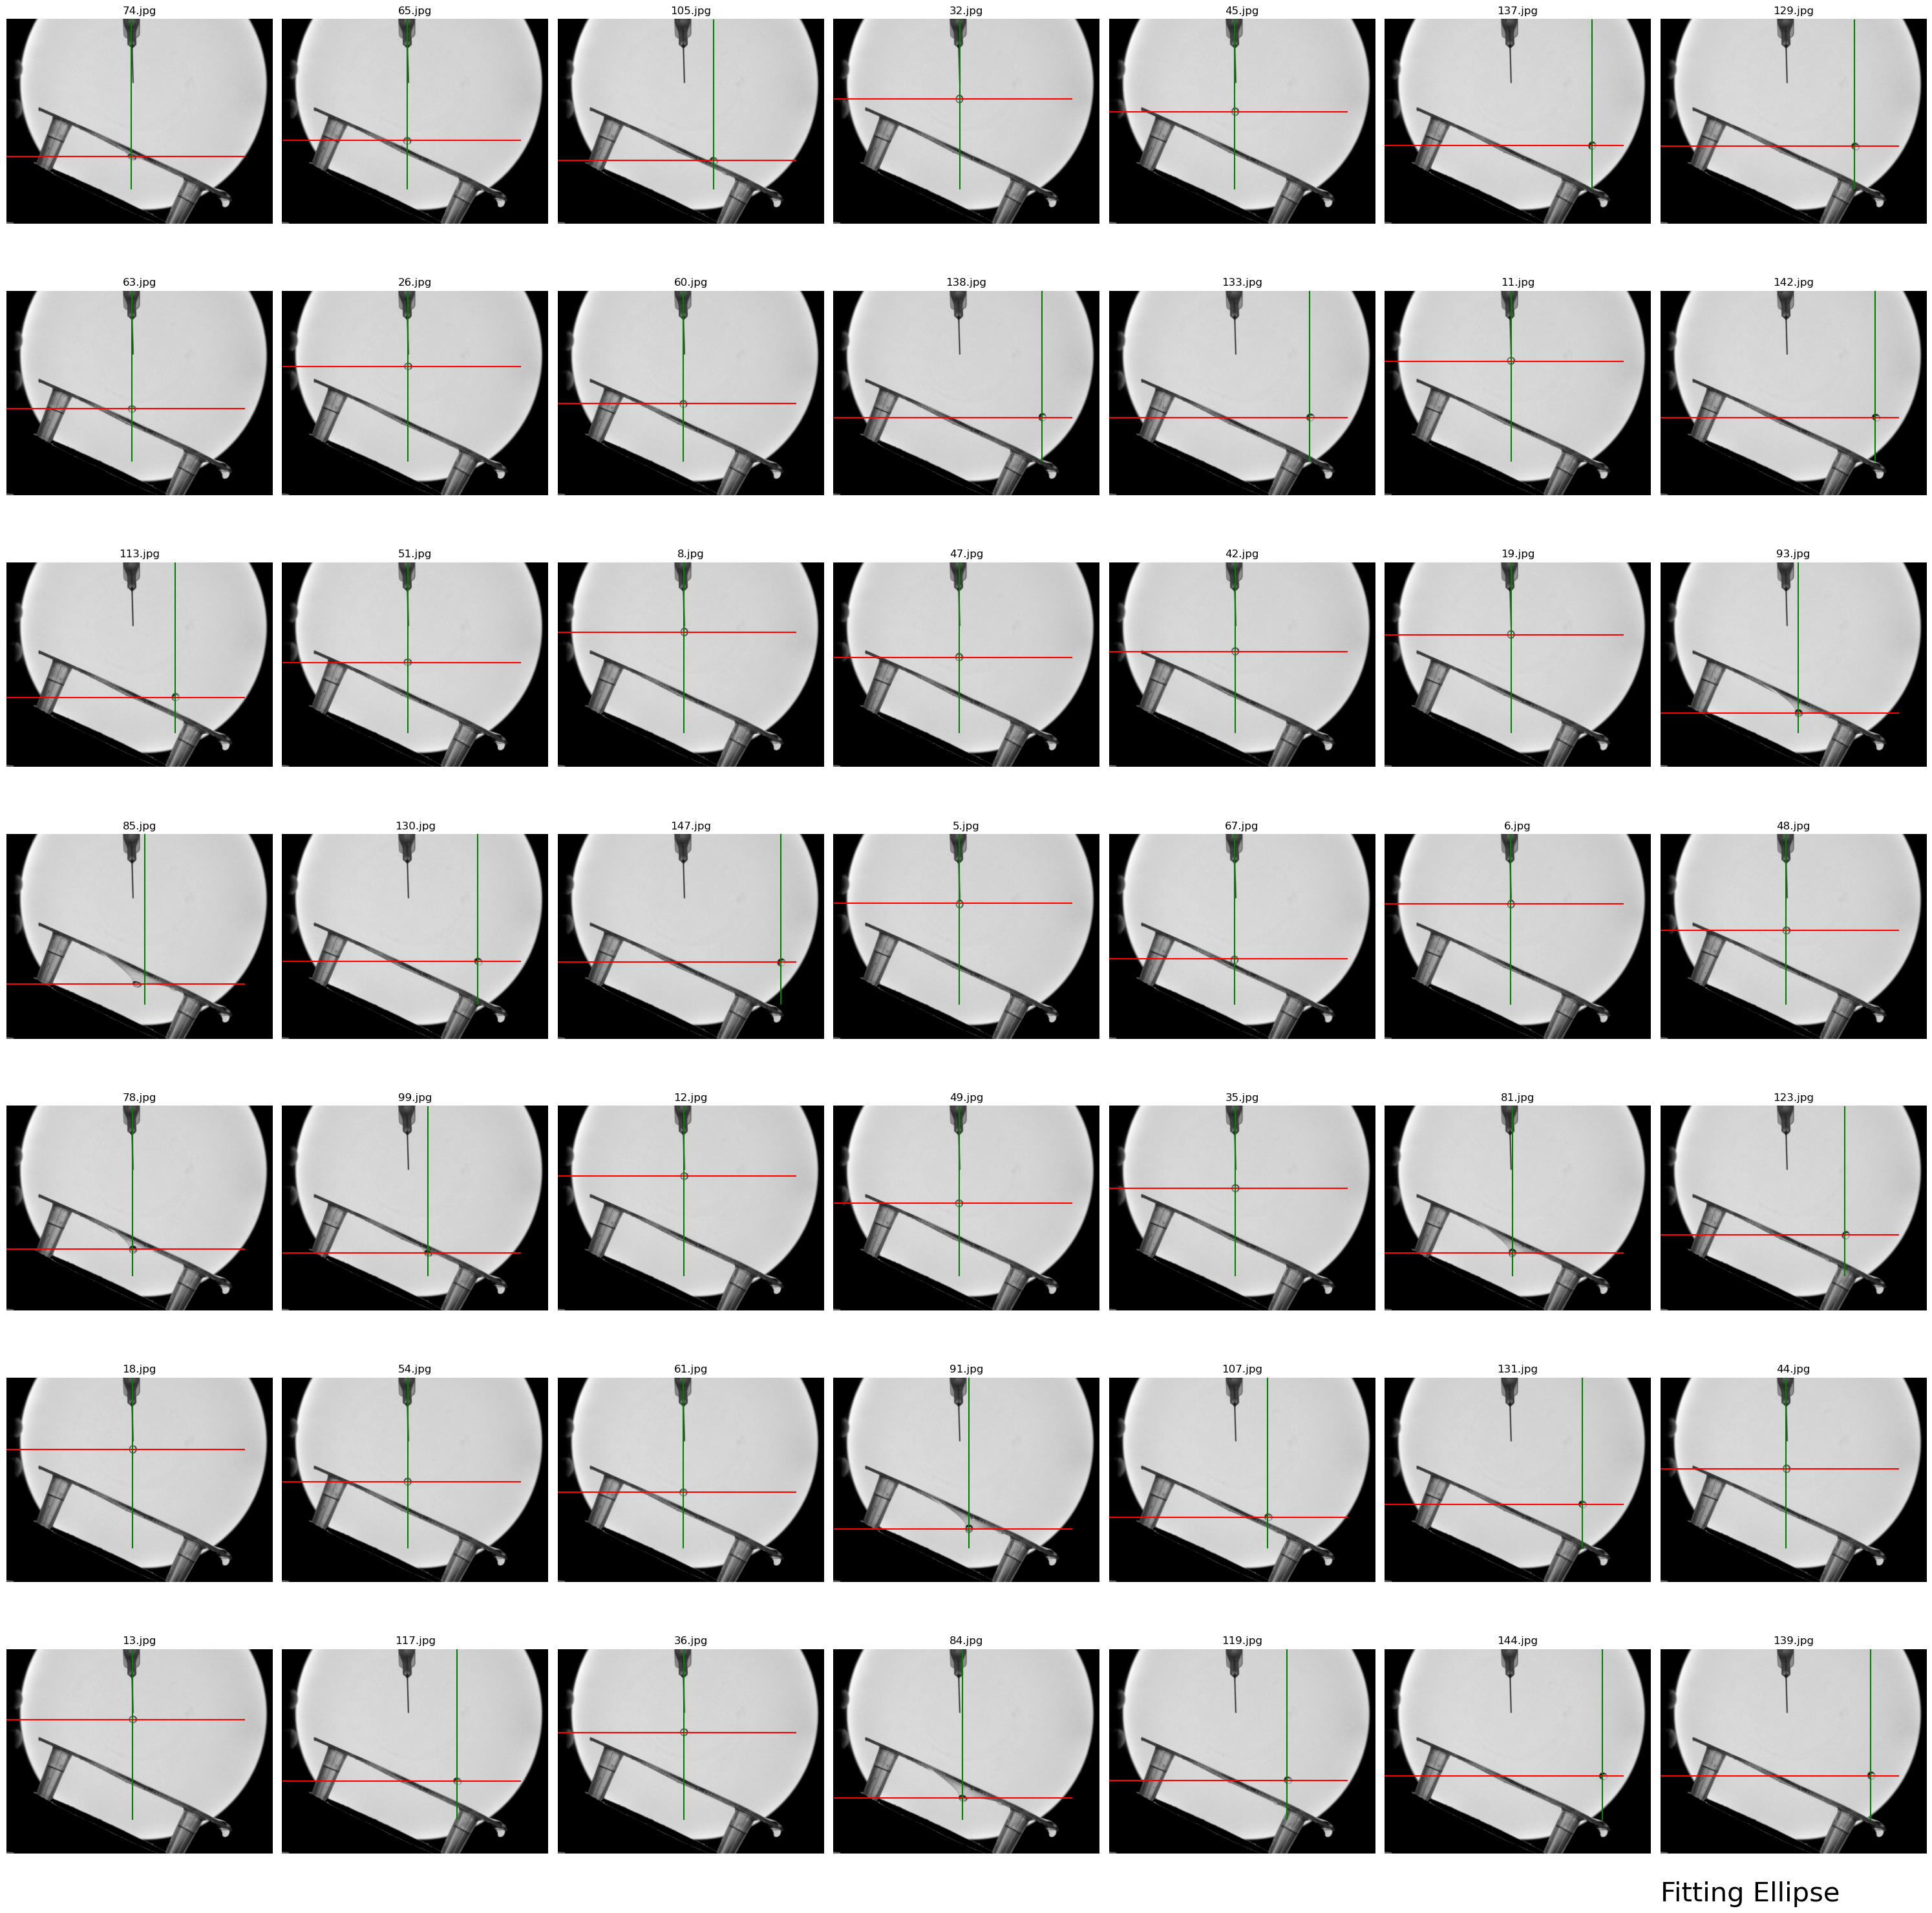

In [ ]:
len_samples = 49
plt.figure(figsize=(30, 30))
df = df[df["x"].notna()]
samples = random.sample(list(df["image"][:-10]), len_samples)
for img in samples:
    plt.subplot(7, 7, samples.index(img)+1)
    x, y =  df[df["image"] == img]["x"].values[0], df[df["image"] == img]["y"].values[0]
    plt.imshow(plt.imread("../data/images1"+"/"+img)[200:, 500:], cmap="gray")
    plt.hlines(y-200, 0, 1300-600, color="r")
    plt.vlines(x-500, 0, 800-300, color="g")
    plt.title(img)
    plt.axis("off")
plt.tight_layout()
plt.annotate("Fitting Ellipse", (0, 0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=30)
plt.savefig("samples_with_ellipse.jpg")

In [ ]:
df.to_csv("../data/results/with_ellipse.csv", index=False)

In [1]:
from run import Run
r = Run("../data/images1")

In [2]:
df = r.all_points(x=0, y=0, h=500, w=500, 
plot=False, crop_included=True)

Getting list of images...
Extracting data from images...
Error on:  ../data/images1/71.jpg
Error on:  ../data/images1/72.jpg
Error on:  ../data/images1/102.jpg
Error on:  ../data/images1/159.jpg
Error on:  ../data/images1/160.jpg
Error on:  ../data/images1/161.jpg
Error on:  ../data/images1/162.jpg
Error on:  ../data/images1/163.jpg
Error on:  ../data/images1/164.jpg
Error on:  ../data/images1/165.jpg
Error on:  ../data/images1/166.jpg
Error on:  ../data/images1/167.jpg
Error on:  ../data/images1/168.jpg
Error on:  ../data/images1/169.jpg
Error on:  ../data/images1/170.jpg
Saving to csv...


In [3]:
df

id     x    y  r1  r2  theta
0      ../data/images1/0.jpg   869  403   8  12   0.24
1      ../data/images1/1.jpg   869  403   8  12   0.25
2      ../data/images1/2.jpg   869  403   9  12   0.25
3      ../data/images1/3.jpg   869  403   9  12   0.24
4      ../data/images1/4.jpg   869  403   9  12   0.26
..                       ...   ...  ...  ..  ..    ...
151  ../data/images1/154.jpg  1186  583   9  11   2.06
152  ../data/images1/155.jpg  1190  585   9  11   2.15
153  ../data/images1/156.jpg  1194  586   9  11   1.98
154  ../data/images1/157.jpg  1198  588   9  10   0.46
155  ../data/images1/158.jpg  1198  589   5   8   0.18

[156 rows x 6 columns]